## Complexité des algorithmes - Exponentiation
On propose, dans ce TP, de comparer deux algorithmes permettant de calculer $n^k$ avec $(n,k) \in (\N \dot \N)$. Ces deux algorithmes sont présentés ci-dessous (tiré de http://www.bibmath.net/dico/index.php?action=affiche&quoi=./e/exponentiationrapide.html).

#### Algorithme 1
```bash
ENTREE : n un entier strictement positif, k un entier naturel
SORTIE : n puissance k
DEBUT
    i ← 0
    resultat ← 1
    TANT QUE i != k FAIRE
        resultat ← resultat * n
        i ← i + 1
    FIN TANT QUE
    RENVOYER résultat
FIN
```

#### Algorithme 2
```bash
ENTREE : n un entier strictement positif, k un entier naturel
SORTIE : n puissance k
DEBUT
    puissance ← n
    resultat ← 1
    TANT QUE k != 0
        SI k est impair FAIRE
            resultat ← resultat * puissance
        FIN SI
        puissance ← puissance * puissance
        k ← partie entière de la division euclidienne de k par 2
    FIN TANT QUE
    RENVOYER resultat
FIN
```

On appelle $T_1 (k)$ et $T_2 (k)$ le nombre d’opérations nécessaires pour réaliser le calcul de $n^k$ avec l’algorithme 1 et 2 respectivement.

#### Question 1.
Programmer ces deux algorithmes dans deux fonctions Python différentes. Vérifier qu’elles renvoient les mêmes résultats.

#### Question 2.
Modifier ces deux fonctions pour qu’elles renvoient le nombre d’opérations nécessaires (additions/soustractions/multiplications/divisions) à la réalisation de l’algorithme.

#### Question 3.
Sur un graphique maptloblib, pour $n=2$, tracer $T_1 (k)$ et $T_2 (k)$   pour $k \in ⟦1,40⟧$. Déterminer la complexité algorithmique du premier algorithme.

#### Question 4.
Sur un autre graphique, tracer $T_2 (k)$  pour $k \in ⟦1,300⟧$. Tracer sur le même graphique une fonction $A×log(k)$, avec $A$ entier positif choisi par vos soins pour qu’il domine $T_2(k)$. En déduire alors la complexité de l’algorithme 2. Conclure.

### Correction

#### Question 1.

In [1]:
def exponentiation_algo_1(n, k):
    i = 0
    resultat = 1
    nb_operations = 0
    while i != k:
        resultat = resultat * n
        i += 1
        nb_operations += 2
    return resultat, nb_operations

def exponentiation_algo_2(n, k):
    puissance = n
    resultat = 1
    nb_operations = 0
    while k != 0:
        if k  % 2 == 1:
            resultat = resultat * puissance
            nb_operations += 1
        puissance = puissance * puissance
        k = k // 2
        nb_operations += 2
    return resultat, nb_operations

assert exponentiation_algo_1(2, 5)[0] == 32
assert exponentiation_algo_2(2, 5)[0] == 32

#### Question 3.

In [4]:
# construction des listes
K = range(1, 41)
# liste du nombre d'opérations pour l'algo 1
T1_k = [exponentiation_algo_1(2, k)[1] for k in K]
# liste du nombre d'opérations pour l'algo 2
T2_k = [exponentiation_algo_2(2, k)[1] for k in K]

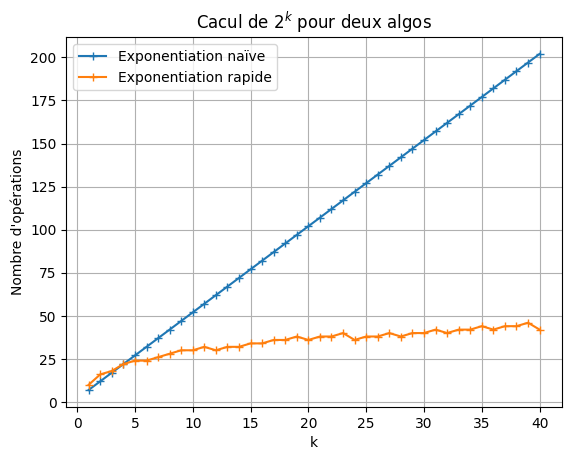

In [9]:
# création du graphique matplotlib
import matplotlib.pyplot as plt
plt.plot(K, T1_k, marker="+", label="Exponentiation naïve")
plt.plot(K, T2_k, marker="+", label="Exponentiation rapide")
plt.legend()
plt.title("Cacul de $2^k$ pour deux algos")
plt.ylabel("Nombre d'opérations")
plt.xlabel("k")
plt.grid()

La complexité algorithmique de l'algorithme 1 semble linéaire.

#### Question 4.

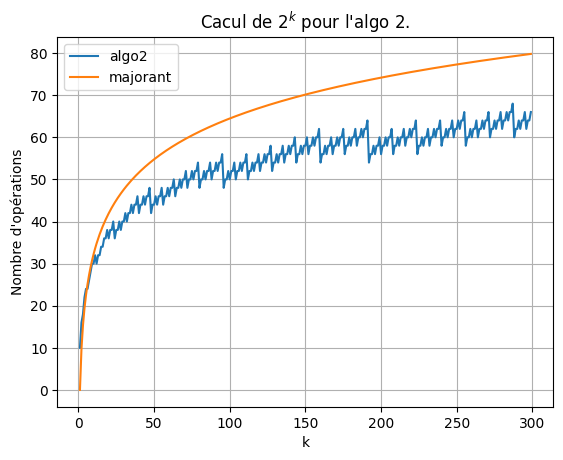

In [17]:
import numpy as np
K = range(1, 300)
# liste du nombre d'opérations pour l'algo 2
T2_k = [exponentiation_algo_2(2, k)[1] for k in K]
# je procède par essai/erreur, je trouve la valeur de A suivante :
A = 14
plt.plot(K, T2_k, label="algo2")
plt.plot(K, A * np.log(K), label="majorant")
plt.legend()
plt.title("Cacul de $2^k$ pour l'algo 2.")
plt.ylabel("Nombre d'opérations")
plt.xlabel("k")
plt.grid()

La complexité algorithmique de l'algo 2 est $O(log(n))$

### Conclusion
L'algorithme 2, de complexité $O(log(n))$, est plus efficace que l'algorithme 1, de complexité $O(n)$.